# Test of eddy detection functions
### Using the eddies.py functions, to be modified to calculate all eddies in Lebreton data ###

*JASaa*

*ISAE-SUPAERO*

## Load data and import functions

In [1]:
from eddies import load_netcdf4,eddy_detection,dataframe_eddies,plot_eddies,julianh2gregorian

#name of the netCDF data file
filename = 'Lebreton_2015.nc'

# load data
(f,lon,lat,depth,uvel,vvel,t) =  load_netcdf4(filename)

# Confidence level, usually 90%
R2_criterion = 0.9

# OW value at which to begin the evaluation of R2
OW_start = -1.0

# Number of local minima to evaluate using R2 method.
# Set low (like 20) to see a few R2 eddies quickly.
# Set high (like 1e5) to find all eddies in domain.
max_evaluation_points = 20 #set to 2000 to capture avery minima, there should be around 1800

# Minimum number of cells required to be identified as an eddie.
min_eddie_cells = 3 # set to 3 to be coherent with the use of the R2 method, 3 points seems like a reasonable minimun for a correlation 

# z-level to plot.  Usually set to 0 for the surface.
k_plot = 0

## Run R2 algorithm

In [2]:
%%capture
day = 0
lon,lat,uvel,vvel,vorticity,OW,OW_eddies,eddie_census,nEddies,circulation_mask = eddy_detection(lon,lat,depth,uvel,vvel,day,R2_criterion,OW_start,max_evaluation_points,min_eddie_cells)

## Print eddy census

In [3]:
dataframe_eddie_census = dataframe_eddies(eddie_census,nEddies)

dataframe_eddie_census

,minOW,circ(m^2/s),lon(º),lat(º),cells,diameter(km)
1,-1.350347,2784.000734,-130.750000,38.250000,36.0,56.501670
2,-2.656577,3898.323590,-126.083336,33.833332,83.0,87.458079
3,-2.565252,5675.036081,-138.916672,38.250000,330.0,169.159219
4,-1.282938,-2837.997411,-136.500000,27.916666,49.0,69.573657
5,-1.440836,4879.774636,-135.333328,36.166668,31.0,53.274351
6,-8.142852,7423.745027,-151.000000,25.833334,91.0,95.105190
7,-2.308635,-3740.353974,-137.666672,37.916668,55.0,69.687053
8,-2.755016,-4088.839230,-136.833328,28.750000,37.0,60.414502
9,-4.691567,5039.681592,-125.250000,36.500000,62.0,74.693475
10,-1.607910,4147.238264,-136.833328,34.833332,49.0,66.916824


## Plot velocities and eddies

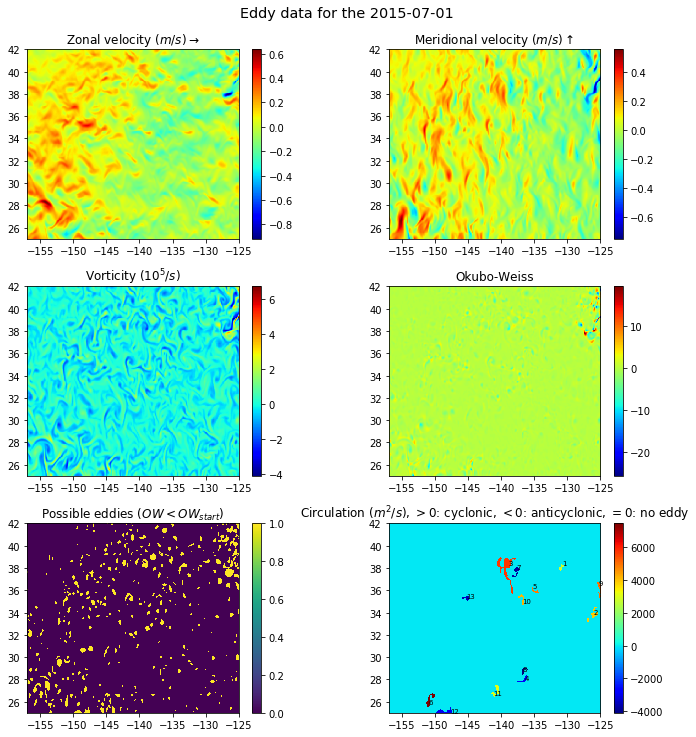

In [4]:
%matplotlib inline

plt = plot_eddies(t[0],lon,lat,uvel,vvel,vorticity,OW,OW_eddies,eddie_census,nEddies,circulation_mask,k_plot)